In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn import linear_model

In [6]:
warnings.filterwarnings('ignore') # 避免sklearn的一些警告

In [7]:
pf = pd.read_excel(r"E:\比赛相关\污染源\白酒行业参数一览表.xls", sheet_name='总表',encodig='utf8')

In [8]:
pf.head()

,单位详细名称,行业名称1,行业代码1,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,污染类别,原料名称,产品名称,...,污染治理设施实际运行参数二名称,污染治理设施实际运行参数二数值,污染治理设施实际运行参数三名称,污染治理设施实际运行参数三数值,污染物排放量,污染物排放量计量单位,K值计算结果,K值核算填报结果,是否有监测数据,监测法核算排放量（吨）
0,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000297,吨,1.0,1.0,/,NaN
1,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000015,吨,1.0,1.0,/,NaN
2,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000004,吨,1.0,1.0,/,NaN
3,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废水,高粱、稻米等,清香型白酒,...,污水处理设施总额定功率,4千瓦,污水处理设施耗电量,1300千瓦时/年,0.000001,吨,1.0,1.0,/,NaN
4,永川区清泉酒厂,白酒制造,1512,20.0,0.007,0.0063,三教工业园区污水处理厂,废气,柴油,蒸汽/热水/其他,...,NaN,NaN,NaN,NaN,0.004330,吨,NaN,1.0,/,NaN


In [9]:
pf.shape

(14384, 36)

#  特征分析和提取

In [10]:
np.where(pf.isnull().sum()/pf.shape[0]<0.5 )[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 30, 31, 33, 34], dtype=int64)

In [11]:
object_col = ['污染类别','原料名称','产品名称', '工艺名称', '生产规模等级','污染物名称','污染物处理工艺名称']  # 需要做labelencoder的列
data = pf[['污染类别','原料名称','产品名称', '工艺名称', '生产规模等级','污染物名称','污染物处理工艺名称']]
for i in object_col:
    lbl = LabelEncoder()
    data[i] = lbl.fit_transform(data[i].astype(str))
    data[i] = data[i]
data.head()

,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称
0,1,11,2,6,1,1,11
1,1,11,2,6,1,4,11
2,1,11,2,6,1,6,11
3,1,11,2,6,1,5,11
4,0,6,10,7,4,7,0


In [12]:
pf['污染物去除效率']= pf['污染物去除效率'].apply(lambda x: float(x.split('%')[0])*0.01)

In [13]:
train  = pf[['工业总产值(当年价格)(千元)']]
train['用水量（万吨）'] = pf['用水量（万吨）'].apply(lambda x: 0 if x=='/' else x)
train['排水量（万吨）'] = pf['排水量（万吨）'].apply(lambda x: 0 if x=='/' else x)
train['是否进入污水处理厂']= pf['是否进入污水处理厂'].map(lambda x: int(x!='/'))
train['原料/燃料用量'] = pf['原料/燃料用量'].apply(lambda x: 0 if np.isnan(x) else x)
train['污染物产生量'] = pf['污染物产生量']
train['污染物去除效率'] = pf['污染物去除效率']
columns = ['工业总产值(当年价格)(千元)', '用水量（万吨）','排水量（万吨）', '是否进入污水处理厂', '原料/燃料用量','污染物产生量','污染物去除效率']
train.head()

,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,原料/燃料用量,污染物产生量,污染物去除效率
0,20.0,0.007,0.0063,1,0.000,0.014232,0.9791
1,20.0,0.007,0.0063,1,0.000,0.000144,0.8957
2,20.0,0.007,0.0063,1,0.000,0.000040,0.8988
3,20.0,0.007,0.0063,1,0.000,0.000028,0.9737
4,20.0,0.007,0.0063,1,1.429,0.004330,0.0000


In [14]:
train = pd.concat([train,data],axis=1)

In [28]:
pf[['污染物排放量']].describe()

,污染物排放量
count,11911.000000
mean,0.222339
std,2.217553
min,0.000000
25%,0.000613
50%,0.010290
75%,0.089600
max,182.509182


In [39]:
train['污染物排放量'] = pf['污染物排放量'].apply(lambda x:x*10000)

In [40]:
train.head()

,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,原料/燃料用量,污染物产生量,污染物去除效率,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称,污染物排放量
0,20.0,0.007,0.0063,1,0.000,0.014232,0.9791,1,11,2,6,1,1,11,2.97
1,20.0,0.007,0.0063,1,0.000,0.000144,0.8957,1,11,2,6,1,4,11,0.15
2,20.0,0.007,0.0063,1,0.000,0.000040,0.8988,1,11,2,6,1,6,11,0.04
3,20.0,0.007,0.0063,1,0.000,0.000028,0.9737,1,11,2,6,1,5,11,0.01
4,20.0,0.007,0.0063,1,1.429,0.004330,0.0000,0,6,10,7,4,7,0,43.30


# 样本外点检测

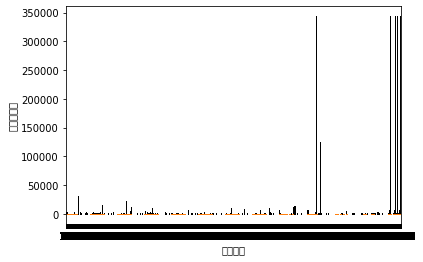

In [225]:

#绘制箱线图
plt.boxplot(train[['工业总产值(当年价格)(千元)', '原料/燃料用量', '污染物排放量']])
plt.xlabel("特征索引")
plt.ylabel("四分位间距")
plt.show()

# 信息熵

In [13]:
from math import log
 
def calcShannonEnt(dataSet):
    numEntries = len(dataSet) # 样本数
    labelCounts = {} # 该数据集每个类别的频数
    for featVec in dataSet:  # 对每一行样本
        currentLabel = featVec[-1] # 该样本的标签
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1 
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries # 计算p(xi)
        shannonEnt -= prob * log(prob, 2)  # log base 2
    return shannonEnt

print(calcShannonEnt(pf))

0.030057322720309997


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019674EBFEB8>,
      dtype=object)

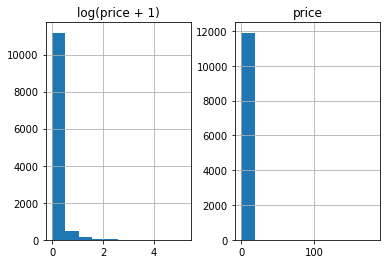

In [14]:
%matplotlib inline
emission = pd.DataFrame({"price":train["污染物排放量"], "log(price + 1)":np.log1p(train["污染物排放量"])})
emission.hist()

In [15]:
train['工业总产值(当年价格)(千元)'].dtypes


dtype('float64')

In [16]:
train['用水量（万吨）'].dtypes

dtype('float64')

In [17]:
train['排水量（万吨）'].dtypes

dtype('float64')

In [18]:
train['是否进入污水处理厂'].dtypes

dtype('int64')

In [19]:
train['原料/燃料用量'].dtypes

dtype('float64')

In [20]:
pf['污染物产生量'].isnull().sum()

1813

In [21]:
import matplotlib.pyplot as plt

In [22]:
X = np.array(train)[:,0:-1]
y = np.array(train)[:, -1]

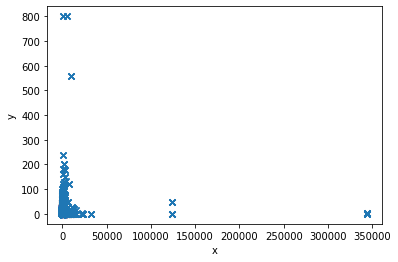

In [23]:
plt.scatter(X, y, marker='x')
# 绘制x轴和y轴坐标
plt.xlabel("x")
plt.ylabel("y")

# 显示图形

plt.show()

# 模型

In [61]:
train_end = train[~train['污染物排放量'].isnull()].reset_index(drop=True)
train_end.shape

(11911, 15)

In [62]:
test_end = train[train['污染物排放量'].isnull()].reset_index(drop=True)
test_end.shape

(2473, 15)

In [63]:
train_end.head()

,工业总产值(当年价格)(千元),用水量（万吨）,排水量（万吨）,是否进入污水处理厂,原料/燃料用量,污染物产生量,污染物去除效率,污染类别,原料名称,产品名称,工艺名称,生产规模等级,污染物名称,污染物处理工艺名称,污染物排放量
0,20.0,0.007,0.0063,1,0.000,0.014232,0.9791,1,11,2,6,1,1,11,2.97
1,20.0,0.007,0.0063,1,0.000,0.000144,0.8957,1,11,2,6,1,4,11,0.15
2,20.0,0.007,0.0063,1,0.000,0.000040,0.8988,1,11,2,6,1,6,11,0.04
3,20.0,0.007,0.0063,1,0.000,0.000028,0.9737,1,11,2,6,1,5,11,0.01
4,20.0,0.007,0.0063,1,1.429,0.004330,0.0000,0,6,10,7,4,7,0,43.30


In [71]:
tr_index = ~train['污染物排放量'].isnull()
train_end = train_end[tr_index].reset_index(drop=True)
y=train_end['污染物排放量'].reset_index(drop=True)
test_end = test_end[~tr_index].reset_index(drop=True)

In [65]:
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score

In [66]:
def lgb_roc_auc_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) 
    return 'f1', roc_auc_score(y_true, y_hat), True

In [69]:
lgb_paras = {'objective': 'binary',
             'learning_rate': 0.1 ,
             'max_depth': 6 ,
             'feature_fraction': 0.8, 
             'bagging_fraction' : 0.8,
             'num_threads':-1}
feature = ['工业总产值(当年价格)(千元)','用水量（万吨）','排水量（万吨）','是否进入污水处理厂','原料/燃料用量','污染物产生量','污染物去除效率'
          ,'污染类别','原料名称','产品名称','工艺名称','生产规模等级','污染物名称','污染物处理工艺名称']

In [68]:
fi = []
cv_score = []
test_pred = np.zeros((test_end.shape[0],))
skf = StratifiedKFold(n_splits=5, random_state=2019, shuffle=True)

In [72]:
for index, (train_index, test_index) in enumerate(skf.split(train_end, y)):
    print(index)
    train_x, test_x, train_y, test_y = train_end.iloc[train_index],train_end.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lgb_model = lgb.train(lgb_paras,
                          train_set = lgb.Dataset(train_x[feature], train_y),
                          valid_sets=[lgb.Dataset(test_x[feature],test_y)],
                          
                          num_boost_round=800 ,
                          feval=lgb_roc_auc_score,
                          verbose_eval=50,
                          categorical_feature = object_col
                          )

    

    y_val = lgb_model.predict(test_x[feature])
    
    print( roc_auc_score( test_y , np.round( y_val) ) )
    
    
    cv_score.append(roc_auc_score(test_y,np.round(y_val)))
    
    print(cv_score[index])
    
    test_pred += lgb_model.predict(test[feature]) / 5

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [47]:
X_train,X_test,y_train,y_test = train_test_split(train_end.iloc[:,:-1],train_end.iloc[:,-1],test_size=0.3)

In [48]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练...')
# 训练
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('开始预测...')
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# 评估
print('预估结果的rmse为:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

开始训练...


LightGBMError: Do not support non-ASCII characters in feature name.

In [30]:
pd.DataFrame({"预测值":y_pred,"实际值":y_test})

,预测值,实际值
1209,0.102463,0.001493
2192,0.236345,0.263658
5262,0.090724,0.000247
6378,0.113035,0.044712
6214,0.109162,0.037856
7200,0.090724,0.001524
4322,0.137948,0.094328
4804,0.718678,1.433600
13580,0.093941,0.000601
6155,0.093941,0.000231
